In [98]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns

sc.settings.verbosity = 3

In [1]:
SCRNA_DIR = '../data/kotliarov-2020/rna/'
SCCITE_DIR = '../data/kotliarov-2020/cite/'
META_PATH = '../data/kotliarov-2020/annotation.csv'

# Annotation

In [100]:
anno = pd.read_csv(META_PATH)

## Data Cleaning

In [101]:
anno

,V1,V2,V3,V4,V5,V6
0,AAACCTGAGAGCCCAA_H1B1ln1,1,C5,C5.0,C5.0.0,256_d0
1,AAACCTGAGGCGTACA_H1B1ln1,1,C6,C6.0,C6.0.0,273_d0
2,AAACCTGCAGGTGGAT_H1B1ln1,1,C0,C0.0,C0.0.0,256_d0
3,AAACCTGCAGTATCTG_H1B1ln1,1,C0,C0.0,C0.0.0,200_d0
4,AAACCTGCATCACAAC_H1B1ln1,1,C2,C2.0,C2.0.0,233_d0
...,...,...,...,...,...,...
53196,TTTGTCAGTACGACCC_H1B2ln6,2,C7,C7.0,C7.0.0,205_d0
53197,TTTGTCAGTCAAACTC_H1B2ln6,2,C7,C7.0,C7.0.0,205_d0
53198,TTTGTCATCCCATTTA_H1B2ln6,2,C5,C5.0,C5.0.0,268_d0
53199,TTTGTCATCGAGAACG_H1B2ln6,2,C2,C2.0,C2.0.0,234_d0


In [102]:
anno = anno.rename(columns={"V1": "cell", "V2": "batch", "V3": "cluster_level1", "V4": "cluster_level2", "V5": "cluster_level3", "V6": "sample"})

In [103]:
anno["batch"] = anno["batch"].astype('category')

In [104]:
anno = anno.set_index('cell')

In [105]:
anno

,batch,cluster_level1,cluster_level2,cluster_level3,sample
cell,,,,,
AAACCTGAGAGCCCAA_H1B1ln1,1,C5,C5.0,C5.0.0,256_d0
AAACCTGAGGCGTACA_H1B1ln1,1,C6,C6.0,C6.0.0,273_d0
AAACCTGCAGGTGGAT_H1B1ln1,1,C0,C0.0,C0.0.0,256_d0
AAACCTGCAGTATCTG_H1B1ln1,1,C0,C0.0,C0.0.0,200_d0
AAACCTGCATCACAAC_H1B1ln1,1,C2,C2.0,C2.0.0,233_d0
...,...,...,...,...,...
TTTGTCAGTACGACCC_H1B2ln6,2,C7,C7.0,C7.0.0,205_d0
TTTGTCAGTCAAACTC_H1B2ln6,2,C7,C7.0,C7.0.0,205_d0
TTTGTCATCCCATTTA_H1B2ln6,2,C5,C5.0,C5.0.0,268_d0


In [106]:
level1_names = [
    'CD4 naive', 
    'CD4 memory T', 
    'Classical monocytes and mDC', 
    'B',  
    'CD8 memory T',
    'NK', 
    'CD8 naive', 
    'Unconventional T cells', 
    'Non-classical monocytes', 
    'pDC'
]

In [107]:
level2_names = [
    'CD4 naive', 'Double-negative T',
    'CD4 central and transitional memory T', 'CD4 effector memory and temra',
    'Classical monocytes', 'mDC', 
    'Transitional B cells', 
    'Switched B cells', 
    'CD8 memory T',
    'NK',
    'CD8 naive', 
    'Unconventional T cells', 
    'Non-classical monocytes', 'pDC'
]

In [108]:
level3_names = [
    'CD4 naive', 'Double-negative T',
    'CD4 central and transitional memory T', 'CD4 effector memory and temra',
    'Classical monocytes', 'IgA monocytes', 'HSC',
    'mDC', 'Transitional B cells', 'Unswitched B cells',
    'Switched B cells', 'CD8 central and transitional memory T',
    'CD8 effector memory and temra', 'NKT-like (CD56+/CD3+)',
    'CD8+ CD103+ T', 'CD16++ NK', 'CD56h/CD16l NK', 'CD8 naive', 
    'CD161 double-negative T', 'Unconventional CD161h/CD8+ T',
    'Non-classical monocytes', 'pDC'
]

In [109]:
anno.cluster_level1 = anno.cluster_level1.astype('category')
anno.cluster_level1 = anno.cluster_level1.cat.rename_categories(level1_names)
anno.cluster_level2 = anno.cluster_level2.astype('category')
anno.cluster_level2 = anno.cluster_level2.cat.rename_categories(level2_names)
anno.cluster_level3 = anno.cluster_level3.astype('category')
anno.cluster_level3 = anno.cluster_level3.cat.rename_categories(level3_names)

In [110]:
anno

,batch,cluster_level1,cluster_level2,cluster_level3,sample
cell,,,,,
AAACCTGAGAGCCCAA_H1B1ln1,1,NK,NK,CD16++ NK,256_d0
AAACCTGAGGCGTACA_H1B1ln1,1,CD8 naive,CD8 naive,CD8 naive,273_d0
AAACCTGCAGGTGGAT_H1B1ln1,1,CD4 naive,CD4 naive,CD4 naive,256_d0
AAACCTGCAGTATCTG_H1B1ln1,1,CD4 naive,CD4 naive,CD4 naive,200_d0
AAACCTGCATCACAAC_H1B1ln1,1,Classical monocytes and mDC,Classical monocytes,Classical monocytes,233_d0
...,...,...,...,...,...
TTTGTCAGTACGACCC_H1B2ln6,2,Unconventional T cells,Unconventional T cells,CD161 double-negative T,205_d0
TTTGTCAGTCAAACTC_H1B2ln6,2,Unconventional T cells,Unconventional T cells,CD161 double-negative T,205_d0
TTTGTCATCCCATTTA_H1B2ln6,2,NK,NK,CD16++ NK,268_d0


# Preproces scRNA-seq

In [111]:
scrna = sc.read_10x_mtx(SCRNA_DIR + 'raw', cache=True)

... reading from cache file cache/..-data-kotliarov2020-rna-raw-matrix.h5ad


## Data Cleaning

In [112]:
scrna.var = scrna.var.rename(columns={'gene_ids': 'gene_symbols'})

In [113]:
scrna.var_names_make_unique()

In [114]:
sc.pp.filter_cells(scrna, min_genes=1)
sc.pp.filter_genes(scrna, min_cells=1)
scrna

/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


filtered out 9093 genes that are detected in less than 1 cells


AnnData object with n_obs × n_vars = 58654 × 23645
    obs: 'n_genes'
    var: 'gene_symbols', 'n_cells'

In [115]:
scrna.raw = scrna

## Quality Control

normalizing counts per cell
    finished (0:00:01)


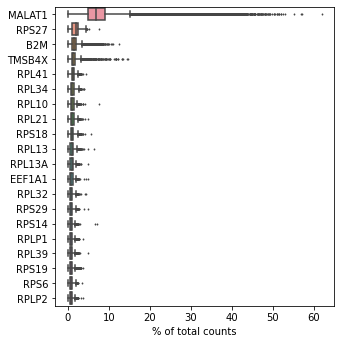

In [116]:
sc.pl.highest_expr_genes(scrna, n_top=20)

In [117]:
# no MT genes
sc.pp.calculate_qc_metrics(scrna, percent_top=None, inplace=True)
scrna

AnnData object with n_obs × n_vars = 58654 × 23645
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/alitinet/opt/miniconda3/envs/episcan/lib/py

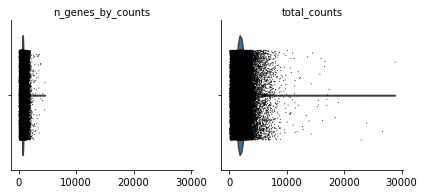

In [118]:
sc.pl.violin(scrna, ['n_genes_by_counts', 'total_counts'], jitter=0.3, multi_panel=True)

/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


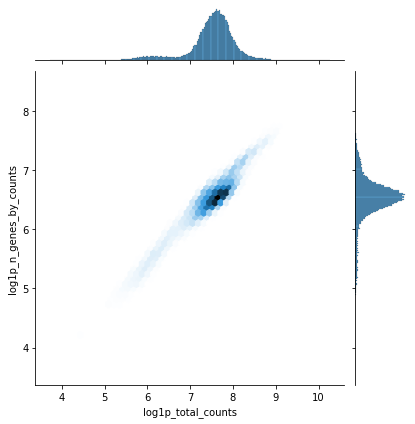

In [119]:
sns.jointplot("log1p_total_counts", "log1p_n_genes_by_counts", data=scrna.obs, kind='hex')

/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


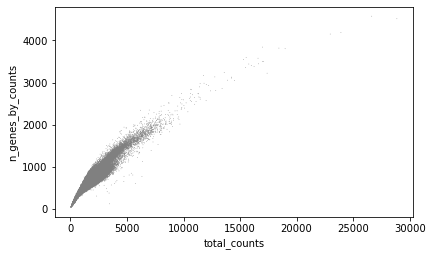

In [120]:
sc.pl.scatter(scrna, x='total_counts', y='n_genes_by_counts')

In [121]:
sc.pp.filter_cells(scrna, min_genes=100)
sc.pp.filter_genes(scrna, min_cells=3)
scrna = scrna[scrna.obs.n_genes_by_counts < 2000, :]
scrna

filtered out 130 cells that have less than 100 genes expressed


/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


filtered out 3186 genes that are detected in less than 3 cells


/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 58333 × 20459
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

## Normalization

In [122]:
sc.pp.normalize_total(scrna, target_sum=1e4)
sc.pp.log1p(scrna)

/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


## Highly variable genes

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


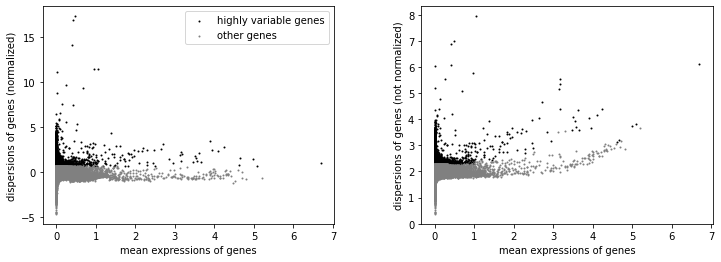

number of highly variable genes = 3999


In [123]:
sc.pp.highly_variable_genes(scrna, n_top_genes=4000)
sc.pl.highly_variable_genes(scrna)
print('number of highly variable genes =', scrna.var.highly_variable.sum())

In [124]:
scrna = scrna[:, scrna.var.highly_variable]
scrna

/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 58333 × 3999
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

## Annotation

In [125]:
scrna.obs = scrna.obs.join(anno, how='left', sort=False)

In [126]:
scrna = scrna[~scrna.obs['cluster_level1'].isnull()]

/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [127]:
scrna.obs

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,batch,cluster_level1,cluster_level2,cluster_level3,sample
AAACCTGAGAGCCCAA_H1B1ln1,723,723,6.584791,1567.0,7.357556,1,NK,NK,CD16++ NK,256_d0
AAACCTGAGGCGTACA_H1B1ln1,776,776,6.655440,2754.0,7.921173,1,CD8 naive,CD8 naive,CD8 naive,273_d0
AAACCTGCAGGTGGAT_H1B1ln1,673,673,6.513230,2485.0,7.818430,1,CD4 naive,CD4 naive,CD4 naive,256_d0
AAACCTGCAGTATCTG_H1B1ln1,595,595,6.390241,1803.0,7.497762,1,CD4 naive,CD4 naive,CD4 naive,200_d0
AAACCTGCATCACAAC_H1B1ln1,707,707,6.562444,1678.0,7.425954,1,Classical monocytes and mDC,Classical monocytes,Classical monocytes,233_d0
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTACGACCC_H1B2ln6,710,710,6.566672,1869.0,7.533694,2,Unconventional T cells,Unconventional T cells,CD161 double-negative T,205_d0
TTTGTCAGTCAAACTC_H1B2ln6,881,881,6.782192,2313.0,7.746733,2,Unconventional T cells,Unconventional T cells,CD161 double-negative T,205_d0
TTTGTCATCCCATTTA_H1B2ln6,743,743,6.612041,1943.0,7.572503,2,NK,NK,CD16++ NK,268_d0
TTTGTCATCGAGAACG_H1B2ln6,1006,1006,6.914731,2545.0,7.842279,2,Classical monocytes and mDC,Classical monocytes,Classical monocytes,234_d0


## Visualization

In [128]:
sc.tl.pca(scrna, random_state=0, svd_solver='arpack', n_comps=50)

computing PCA
    on highly variable genes


/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    with n_comps=50
    finished (0:00:07)


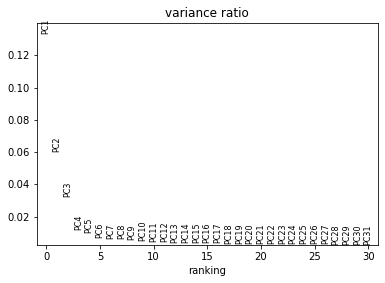

In [129]:
sc.pl.pca_variance_ratio(scrna)

In [130]:
sc.pp.neighbors(scrna, n_pcs=10)
sc.tl.umap(scrna)

computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:36)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:51)


/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'sample' as categorical


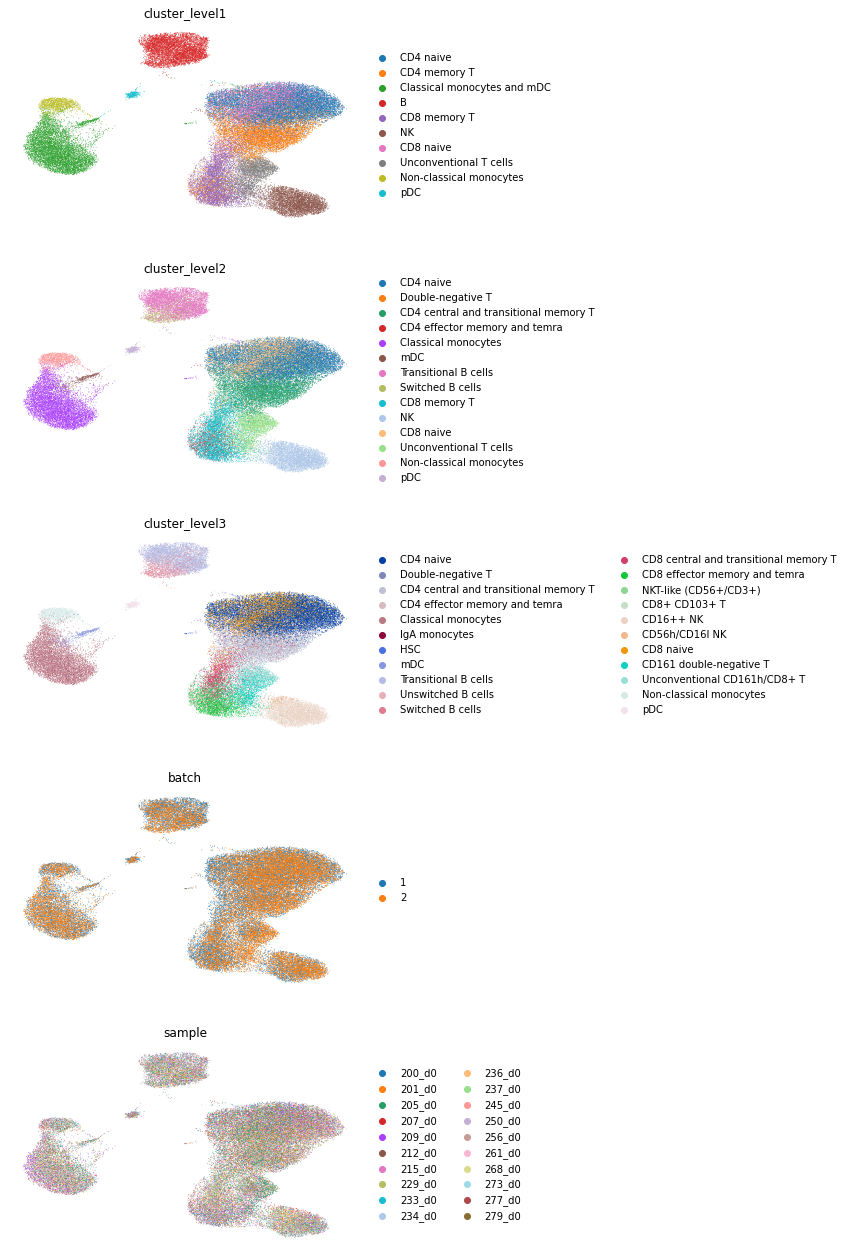

In [131]:
sc.pl.umap(scrna, color=['cluster_level1', 'cluster_level2', 'cluster_level3', 'batch', 'sample'], frameon=False, ncols=1)

# Preproces CITE-seq

In [132]:
cite = sc.read_10x_mtx(SCCITE_DIR + 'raw', cache=True)

... reading from cache file cache/..-data-kotliarov2020-cite-raw-matrix.h5ad


## Data Cleaning

In [133]:
cite.var = cite.var.rename(columns={'gene_ids': 'gene_symbols'})

In [134]:
cite.var_names_make_unique()

In [135]:
sc.pp.filter_cells(cite, min_genes=1)
sc.pp.filter_genes(cite, min_cells=1)
cite

/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


AnnData object with n_obs × n_vars = 58654 × 87
    obs: 'n_genes'
    var: 'gene_symbols', 'n_cells'

In [136]:
cite.raw = cite

## Quality Control

normalizing counts per cell
    finished (0:00:00)


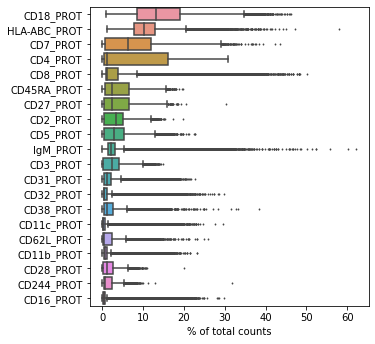

In [137]:
sc.pl.highest_expr_genes(cite, n_top=20)

## Normalization
Taken from https://github.com/theislab/scanpy/issues/1208, also discussed in https://github.com/theislab/scanpy/pull/1117.

In [138]:
def clr_normalize_each_cell(adata, inplace=True):
    """Normalize count vector for each cell, i.e. for each row of .X"""

    import numpy as np
    import scipy

    def seurat_clr(x):
        # TODO: support sparseness
        s = np.sum(np.log1p(x[x > 0]))
        exp = np.exp(s / len(x))
        return np.log1p(x / exp)

    if not inplace:
        adata = adata.copy()

    # apply to dense or sparse matrix, along axis. returns dense matrix
    adata.X = np.apply_along_axis(
        seurat_clr, 1, (adata.X.A if scipy.sparse.issparse(adata.X) else adata.X)
    )
    return adata

In [139]:
cite = clr_normalize_each_cell(cite)

## Annotation

In [140]:
cite.obs = cite.obs.join(anno, how='left', sort=False)

In [141]:
cite = cite[~cite.obs['cluster_level1'].isnull()]

/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [142]:
cite.obs

,n_genes,batch,cluster_level1,cluster_level2,cluster_level3,sample
AAACCTGAGAGCCCAA_H1B1ln1,71,1,NK,NK,CD16++ NK,256_d0
AAACCTGAGGCGTACA_H1B1ln1,64,1,CD8 naive,CD8 naive,CD8 naive,273_d0
AAACCTGCAGGTGGAT_H1B1ln1,70,1,CD4 naive,CD4 naive,CD4 naive,256_d0
AAACCTGCAGTATCTG_H1B1ln1,67,1,CD4 naive,CD4 naive,CD4 naive,200_d0
AAACCTGCATCACAAC_H1B1ln1,74,1,Classical monocytes and mDC,Classical monocytes,Classical monocytes,233_d0
...,...,...,...,...,...,...
TTTGTCAGTACGACCC_H1B2ln6,76,2,Unconventional T cells,Unconventional T cells,CD161 double-negative T,205_d0
TTTGTCAGTCAAACTC_H1B2ln6,77,2,Unconventional T cells,Unconventional T cells,CD161 double-negative T,205_d0
TTTGTCATCCCATTTA_H1B2ln6,79,2,NK,NK,CD16++ NK,268_d0
TTTGTCATCGAGAACG_H1B2ln6,83,2,Classical monocytes and mDC,Classical monocytes,Classical monocytes,234_d0


## Visualization

In [143]:
sc.tl.pca(cite, random_state=0, svd_solver='arpack', use_highly_variable=False)

computing PCA
    with n_comps=50
    finished (0:00:00)


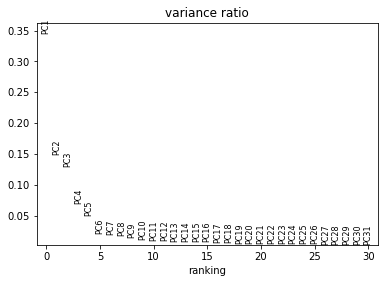

In [144]:
sc.pl.pca_variance_ratio(cite)

In [145]:
sc.pp.neighbors(cite)
sc.tl.umap(cite)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:27)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:56)


/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'sample' as categorical


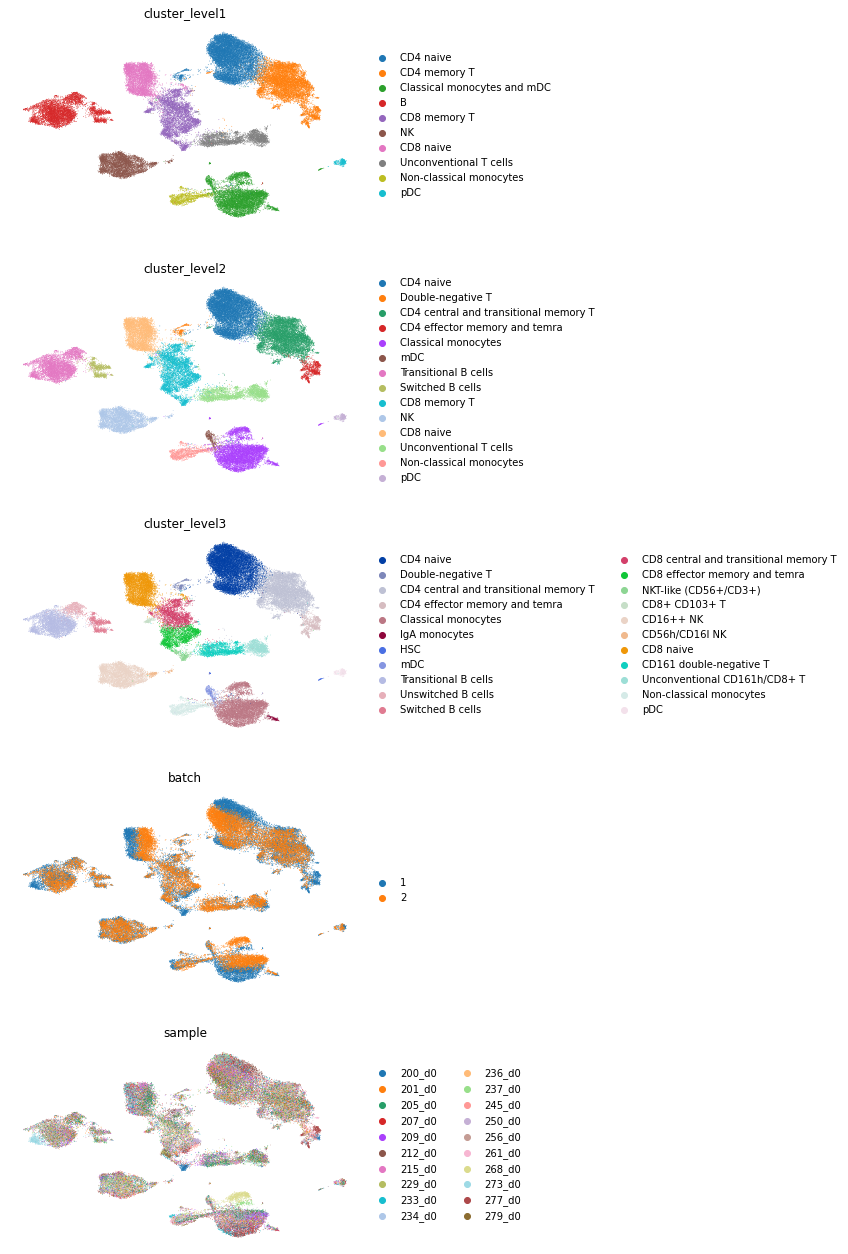

In [146]:
sc.pl.umap(cite, color=['cluster_level1', 'cluster_level2', 'cluster_level3', 'batch', 'sample'], frameon=False, ncols=1)

# Save the results

## Find common cells

In [147]:
com_index = set(scrna.obs.index) & set(cite.obs.index)
scrna = scrna[scrna.obs.index.isin(com_index)]
cite = cite[cite.obs.index.isin(com_index)]
print(scrna.shape, cite.shape)

/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


(53196, 3999) (53196, 87)


In [148]:
scrna.write(SCRNA_DIR + 'expressions.h5ad')

/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


In [149]:
cite.write(SCCITE_DIR + 'protein.h5ad')

/Users/alitinet/opt/miniconda3/envs/episcan/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
